# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**: Fabien, Laura, Sarah  

**ID**: fmd48,lka27,Sec275

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\FM's Laptop\Downloads\College\BEE 4750\HW\HW2\hw02`
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed Xorg_xkbcomp_jll ────────── v1.4.2+4
   Installed Libmount_jll ────────────── v2.35.0+0
   Installed LoggingExtras ───────────── v1.0.0
   Installed GR_jll ──────────────────── v0.72.7+0
   Installed Preferences ─────────────── v1.4.0
   Installed Accessors ───────────────── v0.1.37
   Installed RelocatableFolders ──────── v1.0.0
   Installed Unitful ─────────────────── v1.14.0
   Installed InlineStrings ───────────── v1.4.0
   Installed ConcurrentUtilities ─────── v2.2.0
   Installed Formatting ──────────────── v0.4.2
   Installed Roots ───────────────────── v2.1.6
   Installed PlotUtils ───────────────── v1.3.5
   Installed Contour ─────────────────── v0.6.2
   Installed Xorg_libpthread_stubs_jll ─ v0.1.0+3
   Installed InvertedIndices ─────────── v1.3.0
   Installed Cairo_jll ───────────────── v1.16.1+1
   Installed OpenSSL ───────────

In [13]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

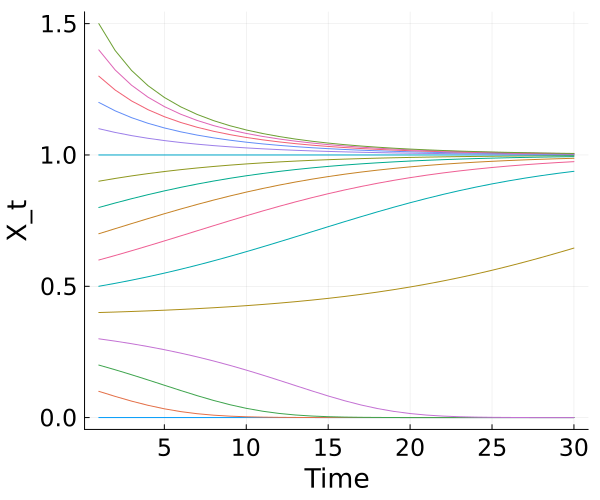

In [62]:
# #Shallow Lake Model

# Define functions for lake recycling and outflows
X_recycling(x, q) = x.^q ./ (1 .+ x.^q)
X_outflow(x, b) = b .* x

T = 30
X_vals = collect(0.0:0.1:1.5)

# Simulation function
function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t] .+ X_recycling(X[t-1], q) .- X_outflow(X[t-1], b)
    end
    return X
end

# Generate data for each X_ic
X_data = map(x -> simulate_lake_P(x, T, 0.5, 1.5, zeros(T), zeros(T)), X_vals)

# Plot all time series
p = plot(ylabel="X_t", xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500))

# Loop through and plot each time series
for i in 1:length(X_vals)
    plot!(1:T, X_data[i], label=false)  # Add each line to the plot
end

display(p)  # Show the plot




Equilibria: 0.0, 1.0


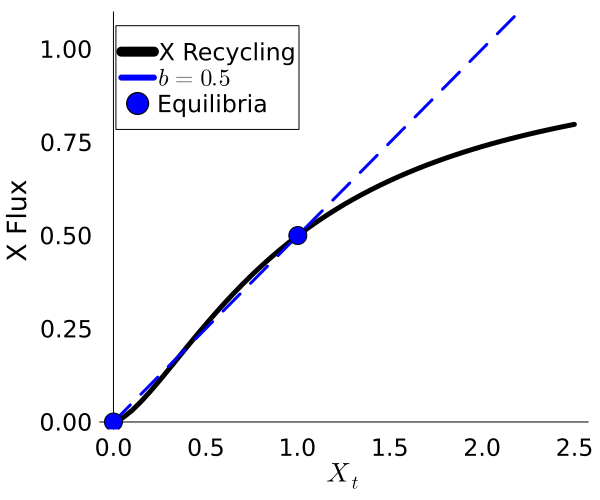

In [64]:
#Finding equilibria

# Define the delta function (X_{t+1} - X_t)
X_delta(x, b, q) = X_recycling(x, q) - X_outflow(x, b)


# Find the equilibria using Roots.jl
equilibrium_1 = find_zero(x -> X_delta(x, b, q), 0.0)   # Guess near 0
equilibrium_2 = find_zero(x -> X_delta(x, b, q), 1.0)   # Guess near 1
println("Equilibria: ", equilibrium_1, ", ", equilibrium_2)


# plot recycling and outflows for selected values of b and q
p1 = plot(x, X_recycling(x, 1.5), color=:black, linewidth=5,legend=:topleft, label="X Recycling", ylabel="X Flux", xlabel=L"$X_t$", tickfontsize=16, guidefontsize=18, legendfontsize=16, palette=:tol_muted, framestyle=:zerolines, grid=:false)
plot!(x, X_outflow(x, 0.5), linewidth=3, linestyle=:dash, label=L"$b=0.5$", color=:blue)
# quiver!([0.1], [0.1], quiver=([1.3], [0.4]), color=:red, linewidth=2)
# quiver!([0.05], [0.2], quiver=([-0.125], [-0.05]), color=:red, linewidth=2)
# quiver!([1.0], [0.65], quiver=([-0.125], [-0.05]), color=:red, linewidth=2)
plot!(ylims=(-0.02, 1.1))
plot!(size=(600, 500))
eq1 = [0.0,1]
scatter!(p1, eq1, (y -> X_recycling(y, 2.5)).(eq1), label="Equilibria", markersize=10, markercolor=:blue)

The equlibria are 1.0 and 0.0. The system is 

## References

List any external references consulted, including classmates.